# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="orange">сложная часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 80 баллов;
* Задача 6 &mdash; 70 баллов;
* Задача 7 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad3_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [481]:
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Literal

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [482]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier

from time import time

import matplotlib.pyplot as plt

from typing import Any, Tuple

---
### <font color="blue"><i>Легкая часть</i></font>

Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 5.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a33928f56f5dc26d8a6754dd7365e93a -->
**1.** Реализуйте логистическую регрессию для двух вариантов поиска оценки параметров:
* простой градиентный спуск;
* стохастический градиентный спуск с `batch_size` элементами на каждой итерации.

Останавливайте итерации при выполнении хотя бы одного из двух условий:
* количество итераций превзошло число `max_iter`;
* оптимизируемый функционал изменился за итерацию не более чем на `tol`.

При выполнении каждой итерации с целью дальнейшего анализа сохраняйте текущее значение оптимизируемого функционала, а также затраченное время на итерацию.  **При реализации класса запрещено пользоваться ИИ-инструментами.**

*Замечания.*

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага. Время измеряйте с помощью `from time import time`.

2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `numpy` или `scipy`:
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html);
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html).
4. Обратите внимание, что класс `LogisticRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.
4. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.


In [483]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class LogisticRegression(BaseEstimator):
    """Модель логистической регрессии.

    Параметры:
    method (Literal['gd', 'sgd']): Метод оптимизации ('gd' - градиентный спуск, 
        'sgd' - стохастический градиентный спуск).
    learning_rate (float): Константа скорости обучения, на которую домножаем градиент при обучении
    tol (float): Допустимое изменение функционала между итерациями.
    max_iter (int): Максимальное число итераций.
    batch_size (int): Размер выборки для оценки градиента (используется только при 'sgd').
    fit_intercept (bool): Добавлять ли константу в признаки.
    save_history (bool): Сохранять ли историю обучения.
    """

    def __init__(
        self,
        method: Literal["gd", "sgd"] = "gd",
        learning_rate: float = 0.5,
        tol: float = 1e-3,
        max_iter: int = int(1e4),
        batch_size: int = 64,
        fit_intercept: bool = True,
        save_history: bool = True,
    ):
        """Создает модель и инициализирует параметры."""
        self.method = method
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # История обучения

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        """Вычисляет сигмоидную функцию."""
        return 1 / (1 + np.exp(-x))

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X
        return X_copy
    
    # напишем функцию потерь
    def loss(self, X: np.ndarray, Y: np.ndarray):
        logit = X.dot(self.coef_)
        losses = np.mean(np.where(Y == 1, np.logaddexp(0, -logit), np.logaddexp(0, logit)))
        return losses

    def fit(self, X: np.ndarray, Y: np.ndarray) -> "LogisticRegression":
        """Обучает модель логистической регрессии.

        Также, в случае self.save_history=True, добавляет в self.history
        текущее значение оптимизируемого функционала и затраченное время.

        Параметры:
        X (np.ndarray): Матрица признаков.
        Y (np.ndarray): Вектор истинных меток.

        Возвращает:
        LogisticRegression: Обученная модель.
        """
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Количество строк в X и Y должно совпадать")

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        # настраиваем начальные параметры
        objects, features = X.shape
        self.coef_ = np.zeros(X_copy.shape[1])
        self.intercept_ = 0
        iter = 0
        prev_loss = np.inf
        start_time = time()
        
        # проходимся по выборке одновременно соблюдая условие на ограничение максимальной итерации
        for iter in range(self.max_iter):
            X_batch = X_copy
            Y_batch = Y
            # выбираем мини-батч рандомно, если градиентный спуск - стохастический
            if self.method == 'sgd':
                batch_indices = np.random.choice(objects, self.batch_size, replace=True)
                X_batch = X_copy[batch_indices]
                Y_batch = Y[batch_indices]
                

            # вычисляем градиент и обновляем коэффициенты
            Y_pred = self._sigmoid(X_batch.dot(self.coef_))
            gradient = X_batch.T.dot(Y_pred - Y_batch) / Y_batch.size
            self.coef_ -= self.learning_rate * gradient

            # считаем длительность итерации
            curr_time = time()
            durability = curr_time - start_time
            start_time = curr_time 

            # считаем функцию потерь
            curr_loss = self.loss(X_copy, Y) 

            if self.save_history:
                self.history.append({'iter': iter, 'iter durability': durability, 'curr_loss': curr_loss})
            
            if np.abs(curr_loss - prev_loss) <= self.tol:
                break
            prev_loss = curr_loss

        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]
            self.coef_ = self.coef_[:-1]
        self.n_iter_ = iter

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Возвращает предсказанные классы.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Предсказанные классы.
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
            self.coef_ = np.append(self.coef_, self.intercept_)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        predictions = (self._sigmoid(X_copy.dot(self.coef_)) >= 0.5).astype(int)
        
        if self.fit_intercept:
            self.coef_ = self.coef_[:-1]
        return predictions

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности классов 0 и 1.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Матрица вероятностей классов (n_samples,
        2).
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
            self.coef_ = np.append(self.coef_, self.intercept_)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        sigmoid = self._sigmoid(X_copy.dot(self.coef_))

        if self.fit_intercept:
            self.coef_ = self.coef_[:-1]

        prob_predictions = np.column_stack((sigmoid, 1- sigmoid))
        return prob_predictions

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
Рассмотрим датасет [Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

**Для данного задания будем рассматривать версию датасета** `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`


Этот датасет содержит статистику здравоохранения и информацию об образе жизни, полученную в результате опросов вместе с меткой наличия/отсутствия диабета у участников. Среди признаков есть демографические данные, результаты лабораторных тестов и ответы на вопросы анкеты. Целевая переменная  `Diabetes_binary` определяет статус пациента: есть ли у него диабет или предиабет (`1`), или он здоров (`0`).



Рассмотрим некоторые признаки, представленные в датасете.

**Показатели здоровья**

- `HighBP`: Высокое кровяное давление (`1` = да, `0` = нет).

- `HighChol`: Высокий уровень холестерина (`1` = да, `0` = нет).

- `CholCheck`: Проверка уровня холестерина за последние 5 лет (`1` = да, `0` = нет).

- `BMI`: Индекс массы тела (рассчитывается как вес (кг) / рост² (м²)).

- `GenHlth`: Общая оценка здоровья (`1` = отличное, `2` = очень хорошее, ..., `5` = плохое).

**Образ жизни**
- `Smoker`: Статус курения (`1` = выкурил ≥100 сигарет за жизнь, `0` = нет).

- `PhysActivity`: Физическая активность вне работы (`1` = да, `0` = нет).

- `Fruits`: Регулярное употребление фруктов (`1` = не менее 1 раз в день, `0` = реже).

**Доступ к медицине**
- `AnyHealthcare`: Наличие медицинской страховки (`1` = да, `0` = нет).

- `NoDocbcCost`: Отказ от визита к врачу из-за стоимости (`1` = да, `0` = нет).



Скачайте файл и прочитайте его с помощью `pandas`.

In [494]:
dataset = pd.read_csv("diabets_health_indicators.csv")
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [495]:
dataset.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2aaab795bfe3971fb1c1e61c48002808 -->
Разделите выборку на обучающую и тестовую и выполните преобразование категориальных признаков.

In [496]:
features_columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
target_column = "Diabetes_binary"

X, y = dataset[features_columns], dataset[target_column]

Разделим на тренировочную и тестовую выборки

In [497]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

Выделим и преобразуем категориальные признаки (из всего датасета)

In [498]:
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'DiffWalk', 'Sex']
real_features = ["BMI", "GenHlth", 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(X_train[categorical_features])

X_train = np.hstack([X_train[real_features], train_cat])

Для интерпретации коэффициентов необходимо нормализовать данные. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`.

In [499]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 107ac5fe506b9f95aacd88457e0ec142 -->
**2.** Обучите две модели логистической регрессии с помощью методов
* простой градиентный спуск;
* стохастический градиентный спуск.

Простой градиентный спуск:

In [500]:
model_gd = LogisticRegression(
    method='gd',
    learning_rate=0.01,
    max_iter=1000,
    tol=1e-8,
    save_history=True
)
model_gd.fit(X_train_scaled, y_train)
print('Простой градиентный спуск')
print(model_gd.coef_)
print(model_gd.intercept_)

Простой градиентный спуск
[ 0.35008978  0.46838099  0.02344939  0.12184317  0.32893185 -0.13333124
 -0.20962037  0.47561209  0.35386738  0.18548063  0.06976798  0.11847774
  0.2427359  -0.11809134 -0.05800673 -0.06892303 -0.14885894  0.04089475
  0.00959159  0.21372138  0.10760251]
0.025762449718517596


Стохастический градиентный спуск

In [501]:
model_sgd = LogisticRegression(
    method='sgd',
    learning_rate=0.01,
    max_iter=1000,
    batch_size=64,
    tol=1e-8,
    fit_intercept=True
)
model_sgd.fit(X_train_scaled, y_train.values)
print('Стохастический градиентный спуск')
print(model_sgd.coef_)
print(model_sgd.intercept_)

Стохастический градиентный спуск
[ 0.35225517  0.45754197  0.01700377  0.11617187  0.33578319 -0.13556432
 -0.21888798  0.48331153  0.34420083  0.18425396  0.06628868  0.12430003
  0.22995623 -0.12477893 -0.05218849 -0.0762694  -0.15053498  0.03174717
 -0.00915352  0.21776718  0.10484112]
0.031589438192915015


Постройте график, на котором нанесите две кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей**. Нарисуйте также график зависимости этого функционала от времени работы метода. 

*Замечания:*
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

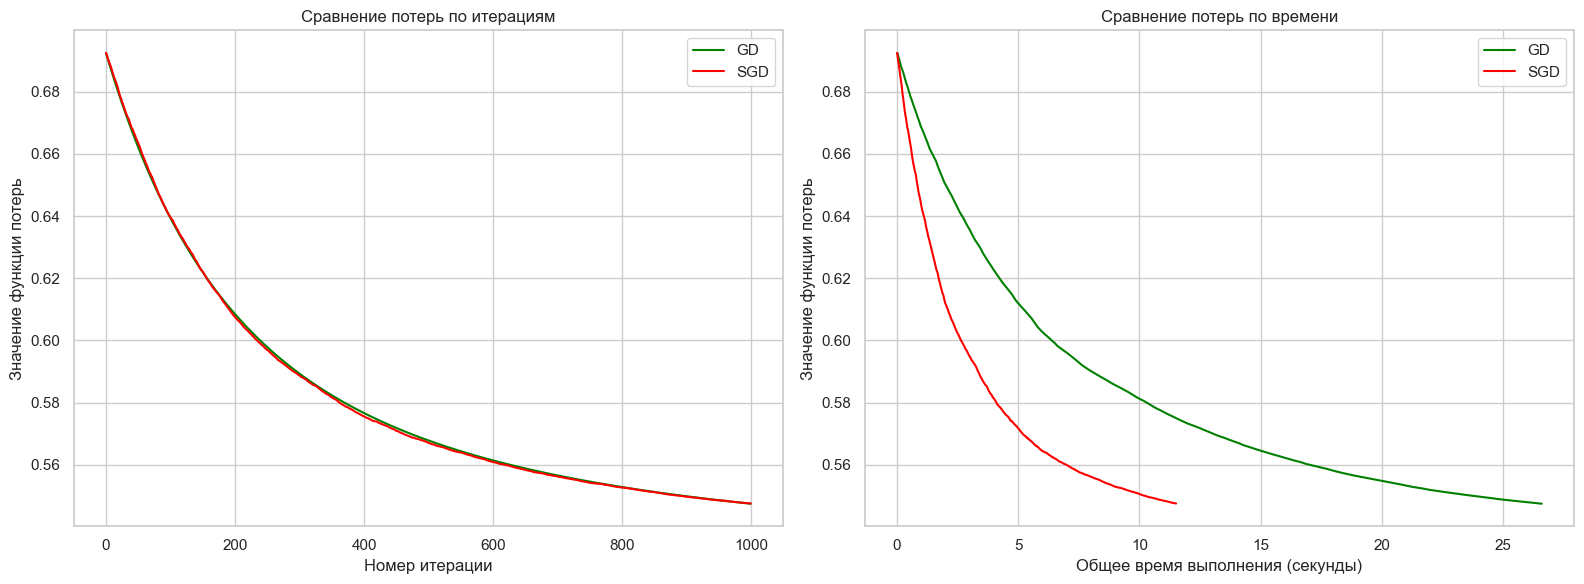

In [502]:
plt.figure(figsize=(16, 6))

iter_gd = [entry['iter'] for entry in model_gd.history]
loss_gd = [entry['curr_loss'] for entry in model_gd.history]
iter_durability_gd = [entry['iter durability'] for entry in model_gd.history]
time_gd = np.array(iter_durability_gd).cumsum()

iter_sgd = [entry['iter'] for entry in model_sgd.history]
loss_sgd = [entry['curr_loss'] for entry in model_sgd.history]
iter_durability_sgd = [entry['iter durability'] for entry in model_sgd.history]
time_sgd = np.array(iter_durability_sgd).cumsum()

# потери от итераций
plt.subplot(1, 2, 1)
plt.plot(iter_gd, loss_gd, 'g-', label='GD')
plt.plot(iter_sgd, loss_sgd, 'r-', label='SGD')
plt.title('Сравнение потерь по итерациям')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
plt.legend()
plt.grid(True)

# потери от времени
plt.subplot(1, 2, 2)
plt.plot(time_gd, loss_gd, 'g-', label='GD')
plt.plot(time_sgd, loss_sgd, 'r-', label='SGD')
plt.title('Сравнение потерь по времени')
plt.xlabel('Общее время выполнения (секунды)')
plt.ylabel('Значение функции потерь')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Сделайте выводы. Что будет при обучении на датасете, если  увеличить количество объектов, а число признаков оставить прежним?

Из оценки коэффициентов разными методами (gd и sgd) заметно, что есть разница между значениями коэффициентов, но непонятно, насколько она критична.
Из графиков заметно, что кривые обучения по итерациями практически совпадают, а по времени отличаются: sgd быстрее оптимизирует функция потерь за счет выбора мини-батчей.

При изменении количества объектов модель будет по-разному вести себя в зависимости от метода. GD: время выполнения увеличится, так как этот метод проходится по всем данным, но при этом вырастет качество. SGD: время останется неизменным, так как размер батча остается прежним.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4bb375127a9740dd293a61773746352d -->
**3.** Исследуйте влияние размер шага (`learning_rate`) на качество модели для двух режимов обучения (простой и стохастический градиентный спуск). Для каждого размера шага получите качество модели при использовании простого и стохастического градиентного спуска. Сравните качество полученных моделей по метрике `accuracy`.

In [503]:
learning_rate_list = np.logspace(-5, 3, 8)
learning_rate_list

array([1.00000000e-05, 1.38949549e-04, 1.93069773e-03, 2.68269580e-02,
       3.72759372e-01, 5.17947468e+00, 7.19685673e+01, 1.00000000e+03])

Сначала проведем обработку тестовых данных

In [504]:
test_cat = encoder.transform(X_test[categorical_features])

X_test = np.hstack([X_test[real_features], test_cat])

In [505]:
X_test_scaled = scaler.transform(X_test)

In [506]:
results = []
history_gd = []
history_sgd = []

for learning_rate in learning_rate_list:
    model_gd = LogisticRegression(
    method='gd',
    learning_rate=learning_rate,
    max_iter=500,
    tol=1e-5,
    save_history=True
    )
    model_gd.fit(X_train_scaled, y_train.values)
    y_pred_gd = model_gd.predict(X_test_scaled)
    accuracy_gd = accuracy_score(y_test, y_pred_gd)
    history_gd.append(model_gd.history)

    model_sgd = LogisticRegression(
    method='sgd',
    learning_rate=learning_rate,
    max_iter=500,
    batch_size=64,
    tol=1e-5,
    save_history=True
    )
    model_sgd.fit(X_train_scaled, y_train.values)
    y_pred_sgd = model_sgd.predict(X_test_scaled)
    accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
    history_sgd.append(model_sgd.history)

    results.append({
        'Learning Rate': f"{learning_rate:.2e}",
        'GD Accuracy': accuracy_gd,
        'SGD Accuracy': accuracy_sgd
    })

results_df = pd.DataFrame(results)
print("\nСравнение методов GD и SGD:")
print(results_df.to_string(index=False, float_format="%.4f"))

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_21384\822404806.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_21384\822404806.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))



Сравнение методов GD и SGD:
Learning Rate  GD Accuracy  SGD Accuracy
     1.00e-05       0.7179        0.7124
     1.39e-04       0.7179        0.7024
     1.93e-03       0.7182        0.7216
     2.68e-02       0.7310        0.7272
     3.73e-01       0.7340        0.7326
     5.18e+00       0.6583        0.7239
     7.20e+01       0.7045        0.6765
     1.00e+03       0.7088        0.6049


Сделайте выводы

1. Нельзя сказать, что sgd однозначно точнее gd или наоборот. Видно, что разница между значением метрик точности для gd и sgd зависит от выбранного leraning rate
2. Точность зависит от learning rate нелинейно: есть экстремум (около 0.373)

Постройте кривые обучения для различных `learning_rate`. Не обязательно рассматривать все `learning_rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них.

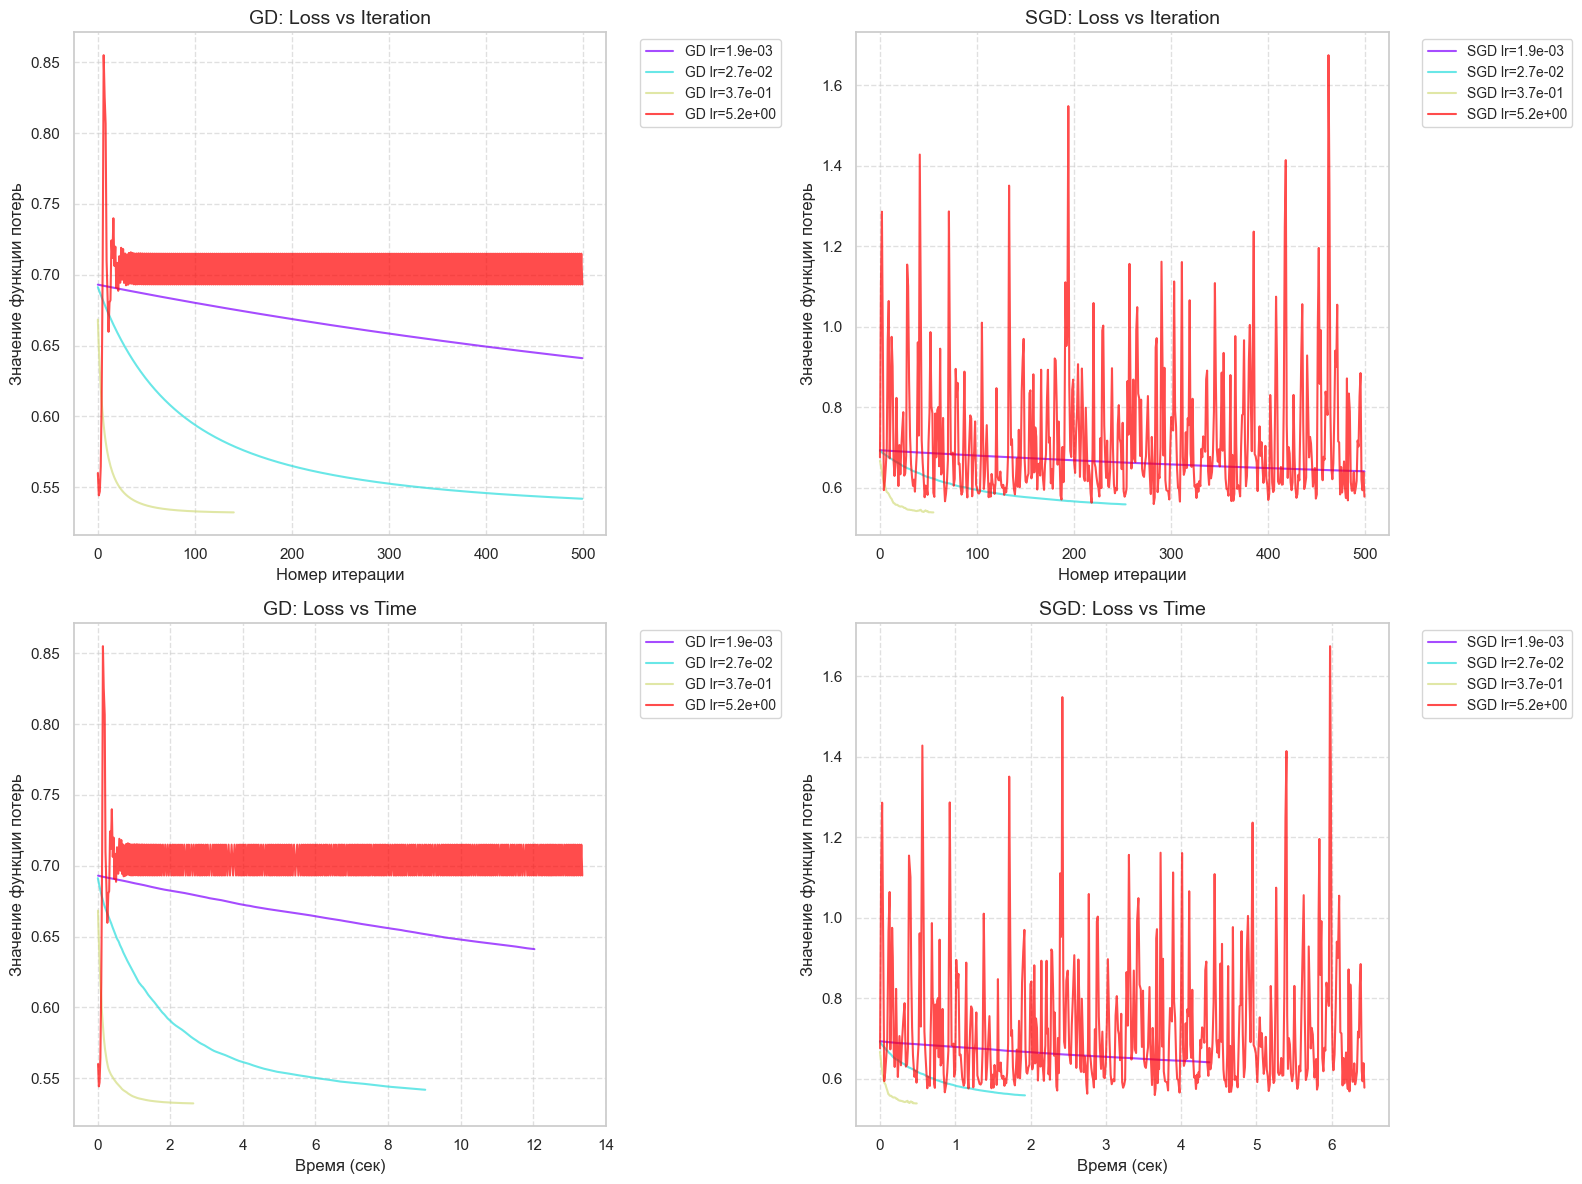

In [507]:
plt.figure(figsize=(16, 12))
selected_indices = range(2, len(learning_rate_list) - 2)
colors = plt.cm.rainbow(np.linspace(0, 1, len(selected_indices)))

# Градиентный спуск (итерации)
plt.subplot(2, 2, 1)
for i, idx in enumerate(selected_indices):
    lr = learning_rate_list[idx]
    color = colors[i]
    
    gd_history = history_gd[idx]
    gd_iters = [entry['iter'] for entry in gd_history]
    gd_loss = [entry['curr_loss'] for entry in gd_history]
    plt.plot(gd_iters, gd_loss, color=color, linestyle='-',
             label=f'GD lr={lr:.1e}', linewidth=1.5, alpha=0.7)

plt.title('GD: Loss vs Iteration', fontsize=14)
plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Значение функции потерь', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Стохастический градиентный спуск (итерации)
plt.subplot(2, 2, 2)
for i, idx in enumerate(selected_indices):
    lr = learning_rate_list[idx]
    color = colors[i]
    
    sgd_history = history_sgd[idx]
    sgd_iters = [entry['iter'] for entry in sgd_history]
    sgd_loss = [entry['curr_loss'] for entry in sgd_history]
    plt.plot(sgd_iters, sgd_loss, color=color, linestyle='-',
             label=f'SGD lr={lr:.1e}', linewidth=1.5, alpha=0.7)

plt.title('SGD: Loss vs Iteration', fontsize=14)
plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Значение функции потерь', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Градиентный спуск (время)
plt.subplot(2, 2, 3)
for i, idx in enumerate(selected_indices):
    lr = learning_rate_list[idx]
    color = colors[i]
    
    gd_history = history_gd[idx]
    gd_loss = [entry['curr_loss'] for entry in gd_history]
    gd_iter_durability = [entry['iter durability'] for entry in gd_history]
    gd_time = np.array(gd_iter_durability).cumsum()

    plt.plot(gd_time, gd_loss, color=color, linestyle='-',
             label=f'GD lr={lr:.1e}', linewidth=1.5, alpha=0.7)

plt.title('GD: Loss vs Time', fontsize=14)
plt.xlabel('Время (сек)', fontsize=12)
plt.ylabel('Значение функции потерь', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Стохастический градиентный спуск (время)
plt.subplot(2, 2, 4)
for i, idx in enumerate(selected_indices):
    lr = learning_rate_list[idx]
    color = colors[i]
    
    sgd_history = history_sgd[idx]
    sgd_loss = [entry['curr_loss'] for entry in sgd_history]
    sgd_iter_durability = [entry['iter durability'] for entry in sgd_history]
    sgd_time = np.array(sgd_iter_durability).cumsum()

    plt.plot(sgd_time, sgd_loss, color=color, linestyle='-',
             label=f'SGD lr={lr:.1e}', linewidth=1.5, alpha=0.7)

plt.title('SGD: Loss vs Time', fontsize=14)
plt.xlabel('Время (сек)', fontsize=12)
plt.ylabel('Значение функции потерь', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

Какой `learning_rate` стоит выбирать в зависимости от способа обучения модели? Чем плохи маленькие и большие `learning_rate`?

При больших lerning rate обучение становится нестабильным: в обоих методах наблюдаются скачки (хотя у sgd все хуже, чем у gd). Маленькие learning rate приводят к медленному обучению модели: на sgd это заметно особенно.

Важно выбирать "золотую середину", которая справляется достаточно быстро, при этом не обладает выраженными флуктуациями

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ff32f56c5ac017a9bbd819e9d918bf17 -->
**4.** Рассмотрите наилучшую модель с предыдущего шага. Визуализируйте значения полученных коэффициентов.

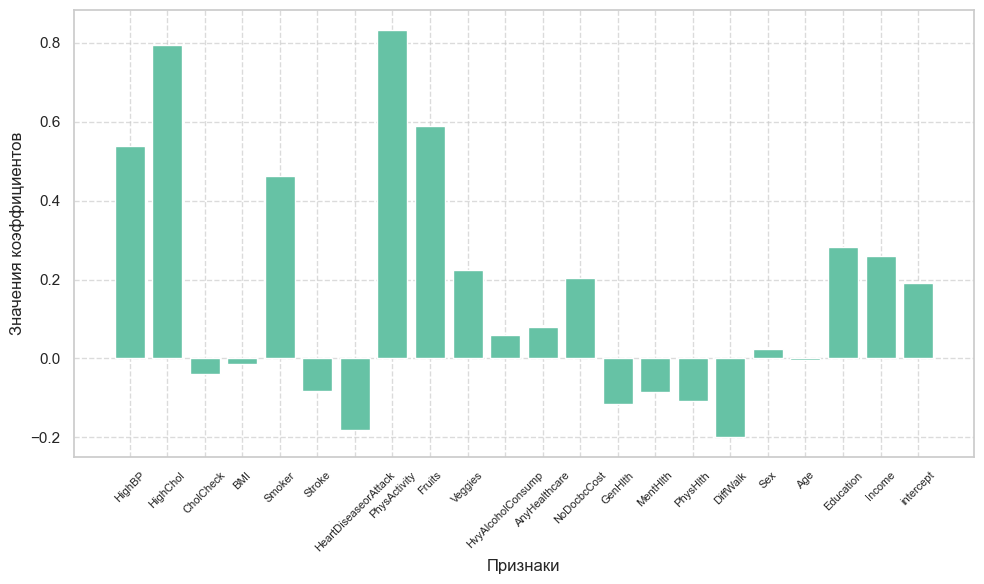

In [508]:
best_learning_rate = learning_rate_list[4] # салатовый на графиках выше
model_gd = LogisticRegression(
    method='gd',
    learning_rate=best_learning_rate,
    max_iter=500,
    tol=1e-5,
    save_history=True,
    fit_intercept=True
    )
model_gd.fit(X_train_scaled, y_train.values)
gd_coef = model_gd.coef_
gd_intercept = model_gd.intercept_

all_features = features_columns + ['intercept']
all_coef = np.append(gd_coef, gd_intercept)

plt.figure(figsize=(10, 6))
plt.bar(all_features, all_coef)
plt.xlabel('Признаки')
plt.ylabel('Значения коэффициентов')
plt.xticks(rotation=45, fontsize=8)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Как можно проинтерпретировать полученные результаты относительно решаемой задачи?

Если значение положительно, то есть прямая зависимость между возникновением диабета и этим признаком (чем его значение больше, тем выше риск), если отрицательно, то наоборот (чем больше значение, тем ниже риск). Очевидно есть показатели, которые влияют на риск возникновения диабета гораздо больше, чем остальные.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d9db1dced64c0f75bb370e31595d818c -->
**5.** Сравните данную модель с бейзлайном, который в качестве предсказания выдает самый частый класс на обучающей выборке.

In [509]:
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train_scaled, y_train)
y_pred_base = baseline.predict(X_test_scaled)
accuracy_base = accuracy_score(y_test, y_pred_base)

y_pred_gd = model_gd.predict(X_test_scaled)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

y_pred_sgd = model_sgd.predict(X_test_scaled)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Baseline Accuracy: {accuracy_base:.2f}")
print(f"GD Accuracy: {accuracy_gd:.2f}")
print(f"SGD Accuracy: {accuracy_sgd:.2f}")

Baseline Accuracy: 0.50
GD Accuracy: 0.73
SGD Accuracy: 0.60


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_21384\822404806.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Насколько хорошее получилось качество обученной модели?

Качество модели по обоим методам превышает baseline, что уже неплохо. Однако sgd сильно проигрывает перед gd. Скорее всего это произошло из-за значений learning rate, batch size, tol, которые так или иначе влияют на качество моделей. При их изменении точность как sgd, так и gd может меняться.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 66af3107d46e304b4ec5d685643fa588 -->
**6.** В исходной выборке оставьте два вещественных признака, которые имеют наибольшее влияние на предсказание в предыдущем пункте. Обучите на них модель на 10000 итерациях. Визуализируйте предсказание класса $1$ для нескольких промежуточных итераций.

In [510]:
iters = [10, 20, 500, 1000, 5000, 10000]

In [511]:
def plot_decision_boundary(
    model: Any,
    X: np.ndarray,
    y: np.ndarray,
    figsize: Tuple[int, int] = (10, 6),
    title: str = "Предсказания модели линейной регрессии",
    xlabel: str = "Признак 1",
    ylabel: str = "Признак 2",
    cmap: str = "summer",
    colorbar_label: str = "Вероятность класса 1",
) -> None:
    """Визуализирует предсказание модели бинарной классификации.

    Параметры:
    model (Any): Обученная модель с методом predict_proba.
    X (np.ndarray): Матрица признаков (только первые два признака используются для визуализации).
    y (np.ndarray): Целевые метки.
    figsize (Tuple[int, int]): Размер графика (по умолчанию (10, 6)).
    title (str): Заголовок графика (по умолчанию "Предсказания модели линейной регрессии").
    xlabel (str): Подпись оси X (по умолчанию "Признак 1").
    ylabel (str): Подпись оси Y (по умолчанию "Признак 2").
    cmap (str): Цветовая схема (по умолчанию "summer").
    colorbar_label (str): Подпись цветовой шкалы (по умолчанию "Вероятность класса 1").
    """

    # Установка границ
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создание сетки
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    # Предсказание вероятностей для сетки
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Построение графика
    plt.figure(figsize=figsize)
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower", cmap=cmap, alpha=0.8)

    # Визуализация исходных точек
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=cmap, s=60, alpha=0.8)

    # Настройка оформления
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(False)
    plt.colorbar(label=colorbar_label)
    plt.show()

Выбираем признаки и строим графики для каждого количества итераций

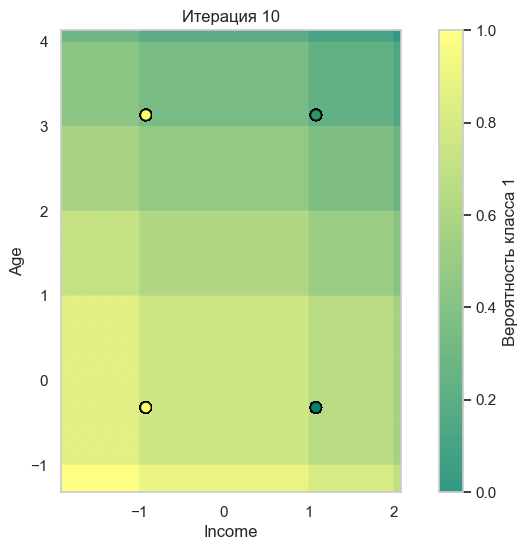

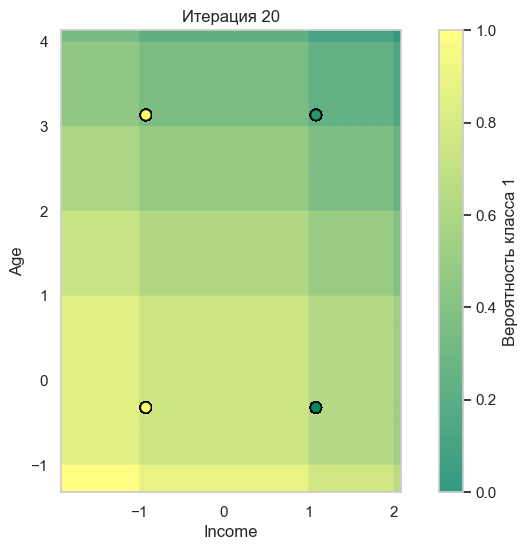

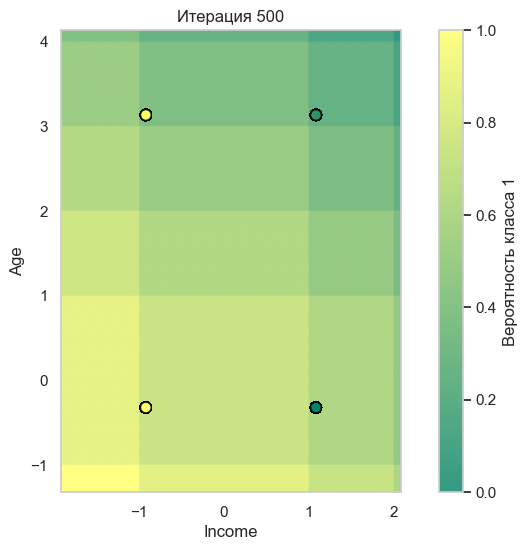

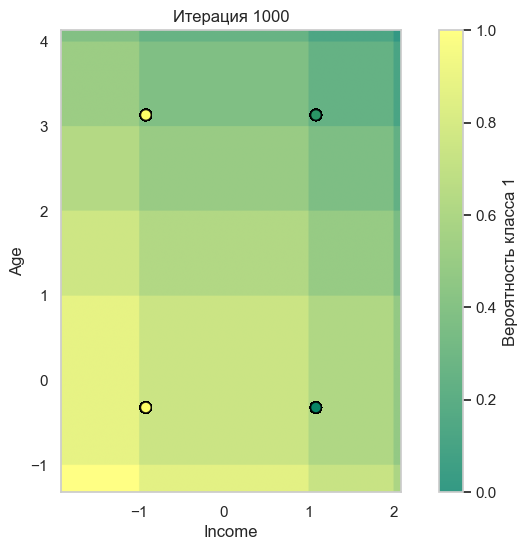

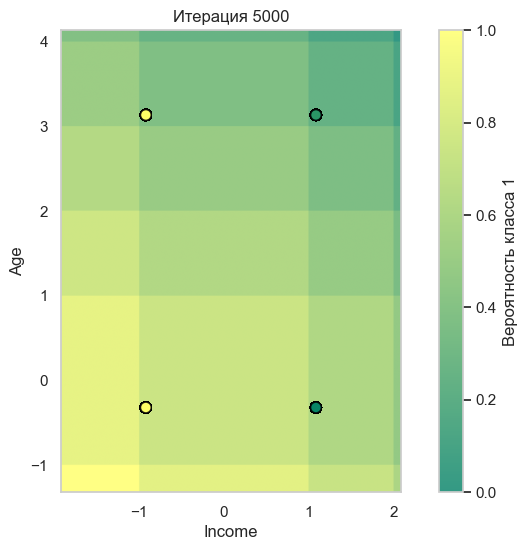

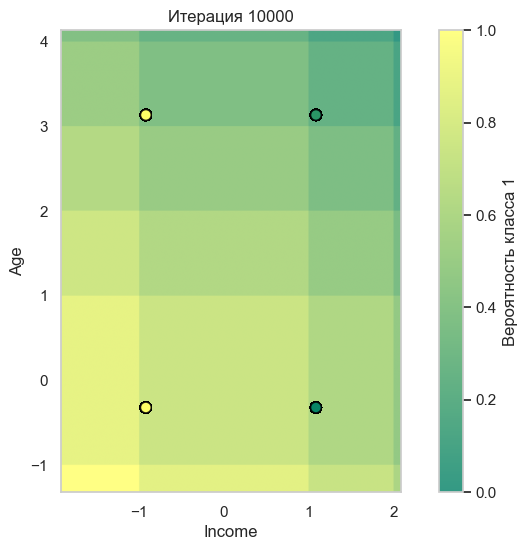

In [512]:
selected_features = ["Income", "Age"]

X_train_selected = pd.DataFrame(X_train_scaled, columns=X.columns)[selected_features].values
X_test_selected = pd.DataFrame(X_test_scaled, columns=X.columns)[selected_features].values



for iter in iters:
    model_gd = LogisticRegression(
        method='gd',
        learning_rate=best_learning_rate,
        max_iter=iter,
        tol=1e-5,
        save_history=True,
        fit_intercept=True
        )
    model_gd.fit(X_train_selected, y_train.values)

    plot_decision_boundary(
        model_gd,
        X_train_selected,
        y_train.values,
        figsize = (10, 6),
        title = f'Итерация {iter}',
        xlabel =  "Income",
        ylabel = "Age",
        colorbar_label = "Вероятность класса 1",
    ) 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- da9c6c1a8068b61752e22c8d3afc9f51 -->
**Вывод:**

1. Эксперимент показал, что оба метода имеют свои преимущества (sgd быстрее, но при этом более подвержен флуктуациям, чем gd). По метрике точности нельзя сказать, что какой-то метод лучше: все зависит от выбранных параметров и данных
2. Что касается последнего задания: с увеличением количества итераций цвет сановится насыщенней (хотя и на немного), что означает повышение точности предсказаний.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d11a6aa59c615661078a02a0c9fe90c8 -->
---
### Задача 6.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\sum_{i=1}^n R\left(Y_i - x_i^T\theta\right) \rightarrow \min_\theta,$$
где $R(x)$ &mdash; функция потерь Хьюбера, определяемая как
$$R(x) = \frac{x^2}{2} I\left\{|x| < c\right\} + c \left(|x| - \frac{c}{2}\right)I\left\{|x| > c\right\}.$$

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

По сути функция потерь Хьюбера в зависимости от значения x относительно c ведет себя либо линейно, либо квадратично. Это позволяет с одной стороны уменьшить влияние больших выбросов, с другой сделать более гладкий градиент (не как у линейной функции)

Градиент функции потерь:
$$
\nabla R_c(r_i) =
\begin{cases}
-r_i \, x_i, & |r_i| \leq c \\
- c \, \text{sign}(r_i) \, x_i, & |r_i| > c
\end{cases}
$$

Градиентный спуск (для обоих случае: в sgd просто используется батч, а не вся выборка):

$$
\theta_{t+1} = \theta_t - \eta \sum\limits_{i=1}^{n} \nabla R
$$


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7564b9fdf7abe57af71d5144cdd94483 -->
**2.** Реализуем теперь класс. **При реализации класса запрещено пользоваться ИИ-инструментами.**

In [513]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class HuberRegression(BaseEstimator):
    """Класс, реализующий линейную регрессию с функцией потерь Хьюбера."""

    def __init__(self, c: float = 1.0, method: Literal["gd", "sgd"] = "gd", fit_intercept: bool = True, max_iter: int = 1000, tol: float = 1e-6, learning_rate: float = 0.01, batch_size: int = 32) -> None:
        """Инициализирует модель.

        Параметры: c (float): Константа из функции потерь Хьюбера.
        fit_intercept (bool): Добавлять ли константный признак. max_iter
        (int): Максимальное число итераций оптимизации.
        """
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.tol = tol
        self.method = method
        self.batch_size = batch_size

    
    def loss_function(self, r: np.ndarray):
        mask = np.abs(r) <= self.c
        loss = np.where(mask, 0.5 * r**2, self.c * (np.abs(r) - 0.5 * self.c))
        return np.mean(loss)

    def fit(self, X: np.ndarray, y: np.ndarray) -> "HuberRegression":
        """Обучает модель.

        Параметры:
        X (np.ndarray): Матрица признаков.
        y (np.ndarray): Вектор целевой переменной.

        Возвращает:
        HuberRegression: Обученная модель.
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество строк в X и y должно совпадать")
        
        if self.fit_intercept:
            X_copy = np.column_stack([np.ones(X.shape[0]), X])
        else:
            X_copy = X.copy()
        
        # задаем параметры
        objects = X_copy.shape[0]
        self.coef_ = np.zeros(X_copy.shape[1])
        self.intercept_ = 0
        iter = 0
        prev_loss = 0

        for iter in range(self.max_iter):
            X_batch = X_copy
            Y_batch = y
            # выбираем мини-батч рандомно, если градиентный спуск - стохастический
            if self.method == 'sgd':
                batch_indices = np.random.choice(objects, self.batch_size, replace=True)
                X_batch = X_copy[batch_indices]
                Y_batch = y[batch_indices]

            r = y - X_copy.dot(self.coef_)
            mask = np.abs(r) <= self.c
            gradient = (-X_batch.T.dot(r * mask) - self.c * X_batch.T.dot(np.sign(r) * (~mask))) / len(Y_batch)
            
            self.coef_ -= self.learning_rate * gradient
            curr_loss = self.loss_function(r)

            if np.abs(curr_loss - prev_loss) <= self.tol:
                break
            prev_loss = curr_loss

        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]
            self.coef_ = self.coef_[:-1]
        self.n_iter_ = iter

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Делает предсказание на новых данных.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Вектор предсказанных значений.
        """

        if self.fit_intercept:
            X_copy = np.column_stack([np.ones(X.shape[0]), X])
            self.coef_ = np.append(self.coef_, self.intercept_)
        else:
            X_copy = X.copy()


        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        pred = X_copy.dot(self.coef_)

        if self.fit_intercept:
            self.coef_ = self.coef_[:-1]

        return pred

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 6a5cd74170aac817f849878e6dc1d059 -->
**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [514]:
train = pd.read_csv('train (2).csv')
test = pd.read_csv('test (1).csv')

Посмотрите на зависимость целевой переменной от каждого признака.

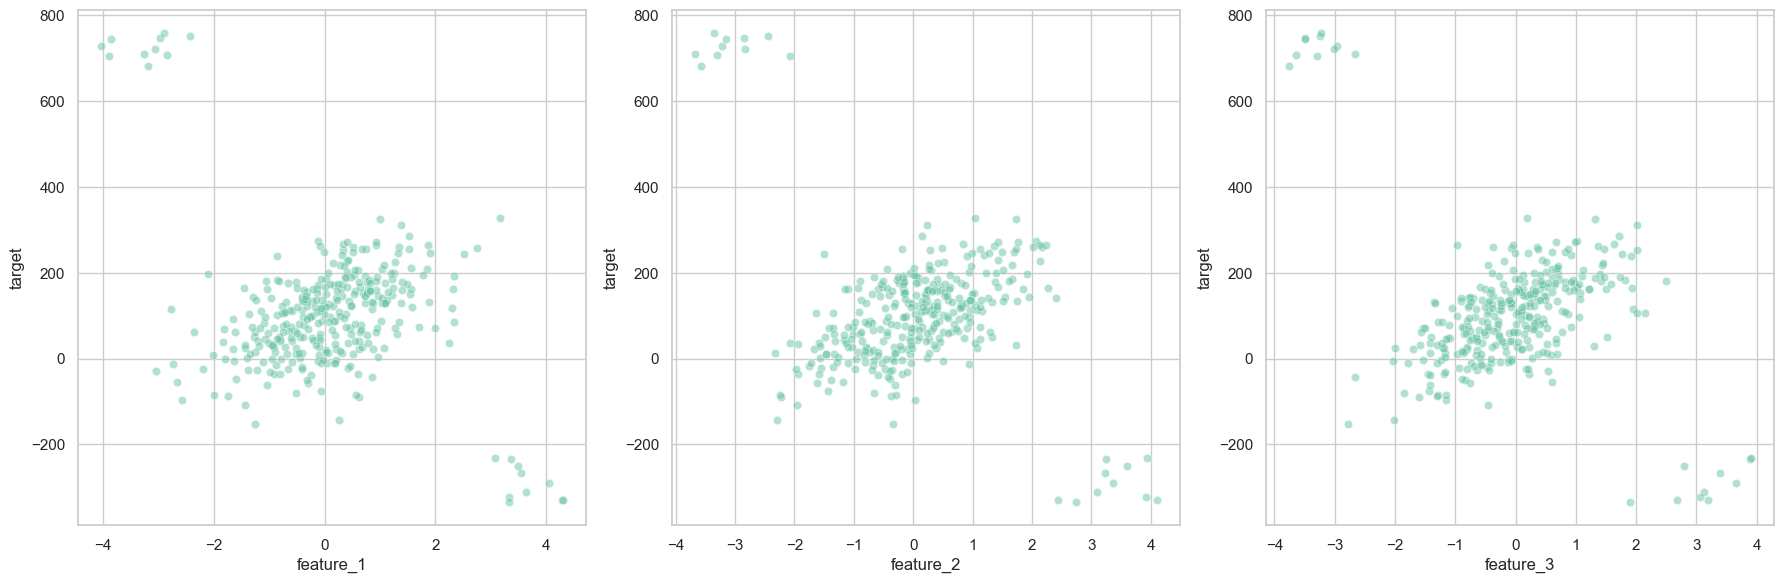

In [515]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='feature_1', y='target', data=train, alpha=0.5)

plt.subplot(1, 3, 2)
sns.scatterplot(x='feature_2', y='target', data=train, alpha=0.5)

plt.subplot(1, 3, 3)
sns.scatterplot(x='feature_3', y='target', data=train, alpha=0.5)

plt.tight_layout()
plt.show()

Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

Выбросы данных не единичны, а располагаются кучками. Это может повлиять на предсказание линейной регрессии (может сделать предсказание более пологим или даже создаст убывающую линейную функцию, проходящую через три кучи). Регрессия Хьюбера избавляет модель от влияния таких выбросов.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4a0c605a165e9e55e65c095ad5963e4c -->
**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

Выделяем признаки и обучаем модель

In [516]:
features = ["feature_1", "feature_2", "feature_3"]
target = "target"
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Считаем метрику MSE на тестовой выборке

In [517]:
y_pred = model.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)

17025.80661012894

Что можно сказать о качестве нашей модели?

MSE ничего не говорит, если мы не знаем подробности про изначальный датасет и его значения, но опираясь на те данные, которые у нас есть, можно сказать, что точность низкая. 

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE.

In [518]:
model_huber = HuberRegression(method='gd', learning_rate=0.2)
model_huber.fit(X_train.values, y_train.values)

,c,1.0
,method,'gd'
,fit_intercept,True
,max_iter,1000
,tol,1e-06
,learning_rate,0.2
,batch_size,32


In [519]:
y_pred_huber = model_huber.predict(X_test)

metrics.mean_squared_error(y_test, y_pred_huber)

2494.0176331177795

Что изменилось?

Значение MSE сильно улучшилось по сравнению с линейной регрессией. Важно отметить, что значение MSE зависит от learning rate, если его поизменять, но в целом дает результат лучше.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2154c451eb280ed839063dce469f6931 -->
**6.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака.

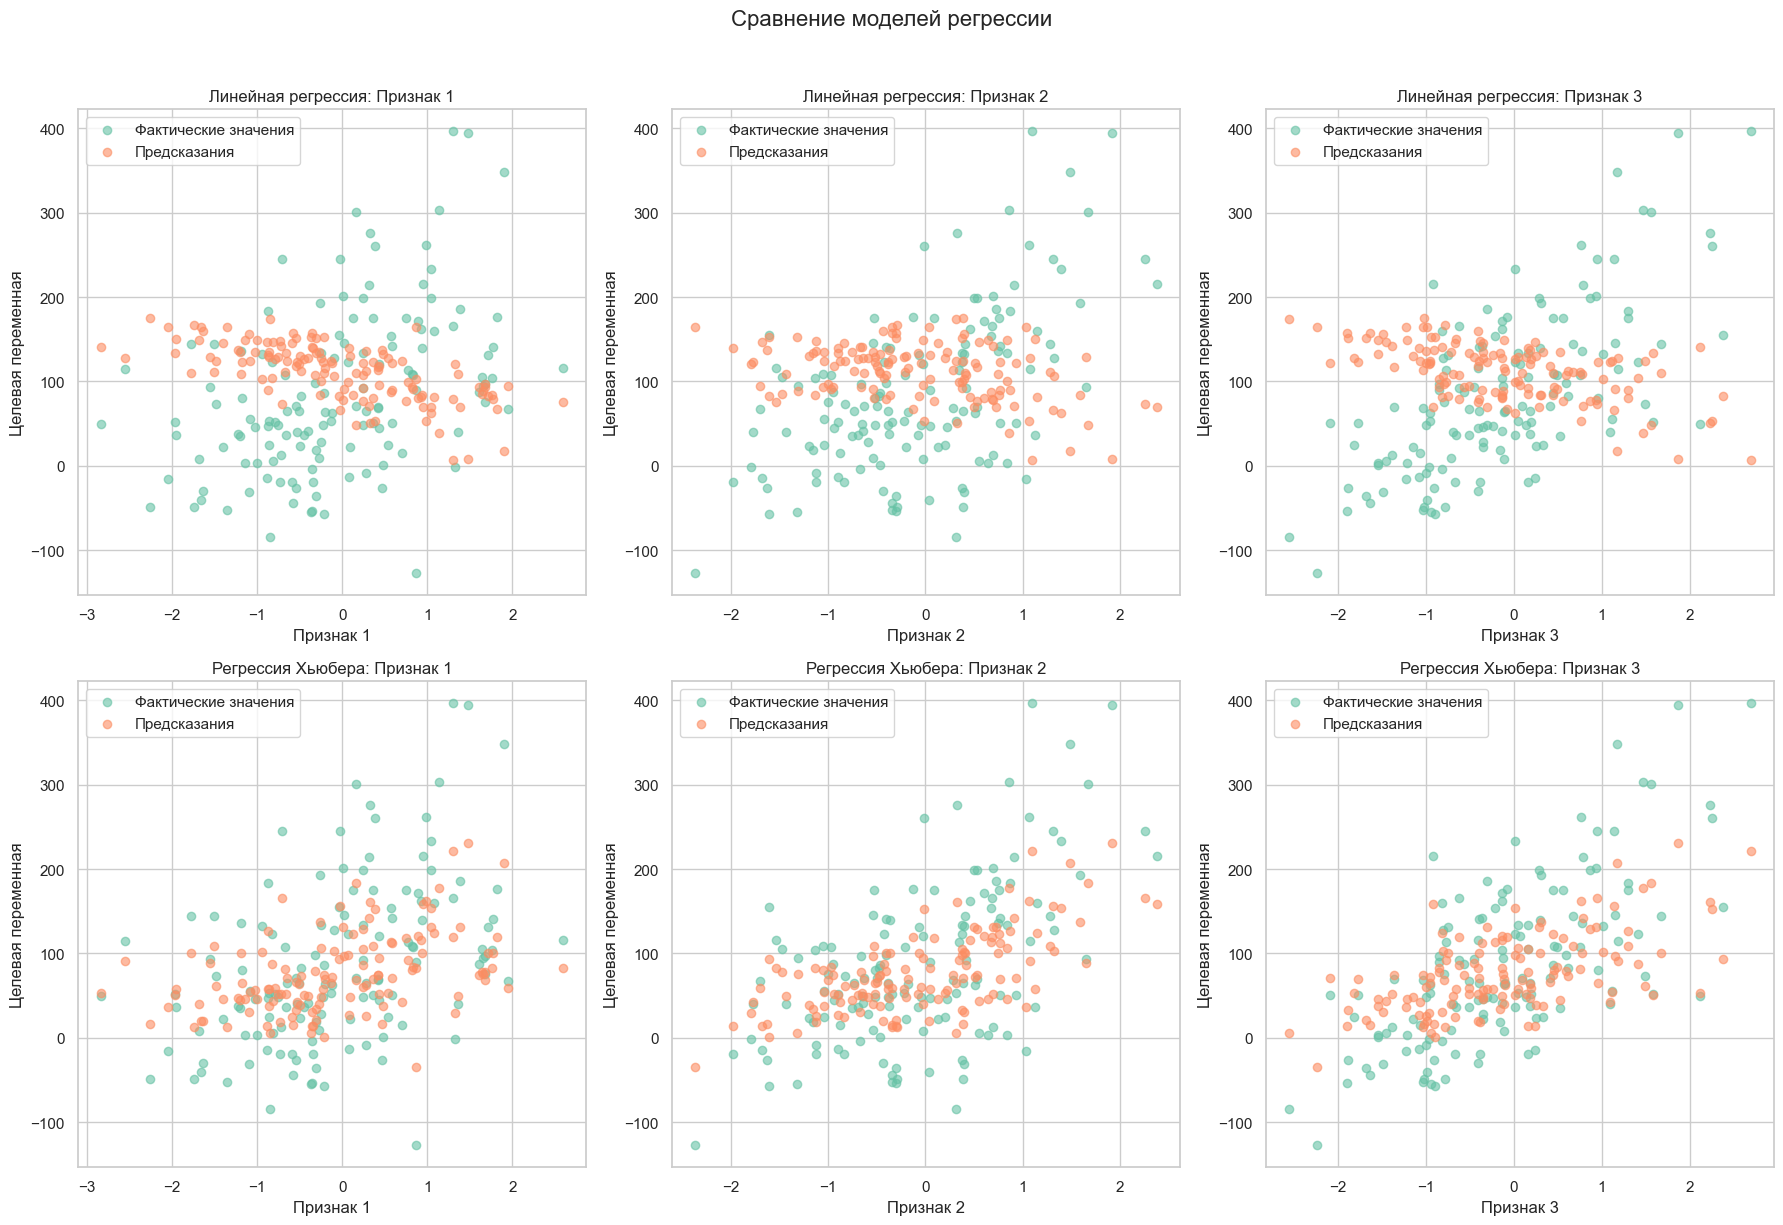

In [520]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
plt.suptitle('Сравнение моделей регрессии', y=1.02, fontsize=16)

feature_names = {
    'feature_1': 'Признак 1',
    'feature_2': 'Признак 2', 
    'feature_3': 'Признак 3'
}

for col, feature in enumerate(['feature_1', 'feature_2', 'feature_3']):
    axes[0, col].set_title(f'Линейная регрессия: {feature_names[feature]}')
    axes[0, col].scatter(X_test[feature], y_test, alpha=0.6, label='Фактические значения')
    axes[0, col].scatter(X_test[feature], y_pred, alpha=0.6, label='Предсказания')
    axes[0, col].set_xlabel(feature_names[feature])
    axes[0, col].set_ylabel('Целевая переменная')
    axes[0, col].legend()

for col, feature in enumerate(['feature_1', 'feature_2', 'feature_3']):
    axes[1, col].set_title(f'Регрессия Хьюбера: {feature_names[feature]}')
    axes[1, col].scatter(X_test[feature], y_test, alpha=0.6, label='Фактические значения')
    axes[1, col].scatter(X_test[feature], y_pred_huber, alpha=0.6, label='Предсказания')
    axes[1, col].set_xlabel(feature_names[feature])
    axes[1, col].set_ylabel('Целевая переменная')
    axes[1, col].legend()

plt.tight_layout()
plt.show()

Что можно заметить на этих графиках?

Как и говорила раньше, выбросы сильно смещают тренд линейной регрессии, даже делая его убывающим, а не возрастающим. Регрессия Хьюбера позволяет меньше учитывать вклад выбросов, поэтому предсказания получаются точнее.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 90cceb512579b67df499239e31ee0e3a -->
**7.** Обучите регрессию Хьюбера на данных из задачи 2 и сравните качество модели с простой линейной регрессией, которую вы построили в задаче 2.

Загружаем датасет из задачи №2

In [521]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Подготавливаем данные

In [522]:
features_columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]
target_column = "cnt"

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

X, y = bike_sharing[features_columns], bike_sharing[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

bike_train = pd.concat([X_train, y_train], axis=1)
bike_test = pd.concat([X_test, y_test], axis=1)

mask_train = ((bike_train['season'] == 3) & (bike_train['cnt'] < 3000) | 
             (bike_train['season'] == 1) & (bike_train['cnt'] > 7000) |
             ((bike_train['season'].isin([2, 4])) & (bike_train['cnt'] < 1000)))
bike_train_cleaned = bike_train[~mask_train]

mask_test = ((bike_test['season'] == 3) & (bike_test['cnt'] < 3000) | 
            (bike_test['season'] == 1) & (bike_test['cnt'] > 7000) |
            ((bike_test['season'].isin([2, 4])) & (bike_test['cnt'] < 1000)))
bike_test_cleaned = bike_test[~mask_test]

encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(bike_train_cleaned[categorical_features])
test_cat = encoder.transform(bike_test_cleaned[categorical_features])

X_train = np.hstack([bike_train_cleaned[real_features], train_cat])
y_train = bike_train_cleaned[target_feature]

X_test = np.hstack([bike_test_cleaned[real_features], test_cat])
y_test = bike_test_cleaned[target_feature]

Обучим на них модель по регресии Хьюбера и выведем значения ошибок

In [523]:
model_huber = HuberRegression()
model_huber.fit(X_train, y_train)

y_pred_huber = model_huber.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred_huber)
mae = metrics.mean_absolute_error(y_test, y_pred_huber)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_huber)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4%}')

MSE: 22372949.4666
MAE: 4304.6728
MAPE: 99.1618%


**Вывод:**

1. По датасету из задачи №2: значение ошибок сильно ухудшилось с использованием регрессии Хьюбера. Возможно это произошло из-за ручной обработки данных. У двух этих моделей разные области применимости.
2. По задаче: эксперимент показал, что важно подбирать правильную функцию потерь в зависимости от модели, так как точность сильно зависит от этого. Так при использовании линейной регрессии в данной задаче мы получили результат mse хуже, чем при использовании регресии Хьюбера.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 38dcbf8dc11db564c7513c7f0e5c8e0d -->
---
### Задача 7.


Рассмотрим модель одномерной регрессии $y(x) = \theta x$, где $x \in \mathbb{R}$ &mdash; одномерный признак, $y \in \mathbb{R}$ &mdash; целевой признак, $\theta \in \mathbb{R}$ &mdash; неизвестный параметр. Имеется выборка размера $n$, полученная по правилу
	$$Y_i = \theta x_i + \varepsilon_i,\ \ \ i=1,...,n,$$
где $\varepsilon_i$ &mdash; случайная ошибка измерений.

Предложите точный алгоритм поиска оценки параметра $\theta$ методом наименьших модулей, то есть $$\sum_{i=1}^n \left|Y_i - \theta x_i\right| \to \min_\theta,$$ работающий за время $O(n \log n)$. Приведите его описание и теоретическое обоснование. Реализация в коде не требуется.

**Решение:**
1. Считаем значения $Y_i / x_i$.
2. Сортируем их в порядке убывания. Можем выбрать для сортировки любой алгоритм со сложностью O(nlogn)
3. Выбираем $\theta = inf$ и считаем функцию потерь для этого значения.
4. Обновляем веса и продолжаем счет функции потерь.
5. Важно, что в какой-то момент функция потерь снова начнет возрастать (т.к. это модуль). Именно в этот момент надо остановиться -  мы нашли оптимальное значение $\theta$. Таким образом, нам нужно хранить значение функции потерь для текущего и предыдущего значений  и сравнивать с собой. 

Просчет этих функций не превышает по временной сложности O(n). В сумме получаем сложность O(nlogn).